In [1]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:06<00:00, 807kB/s] 


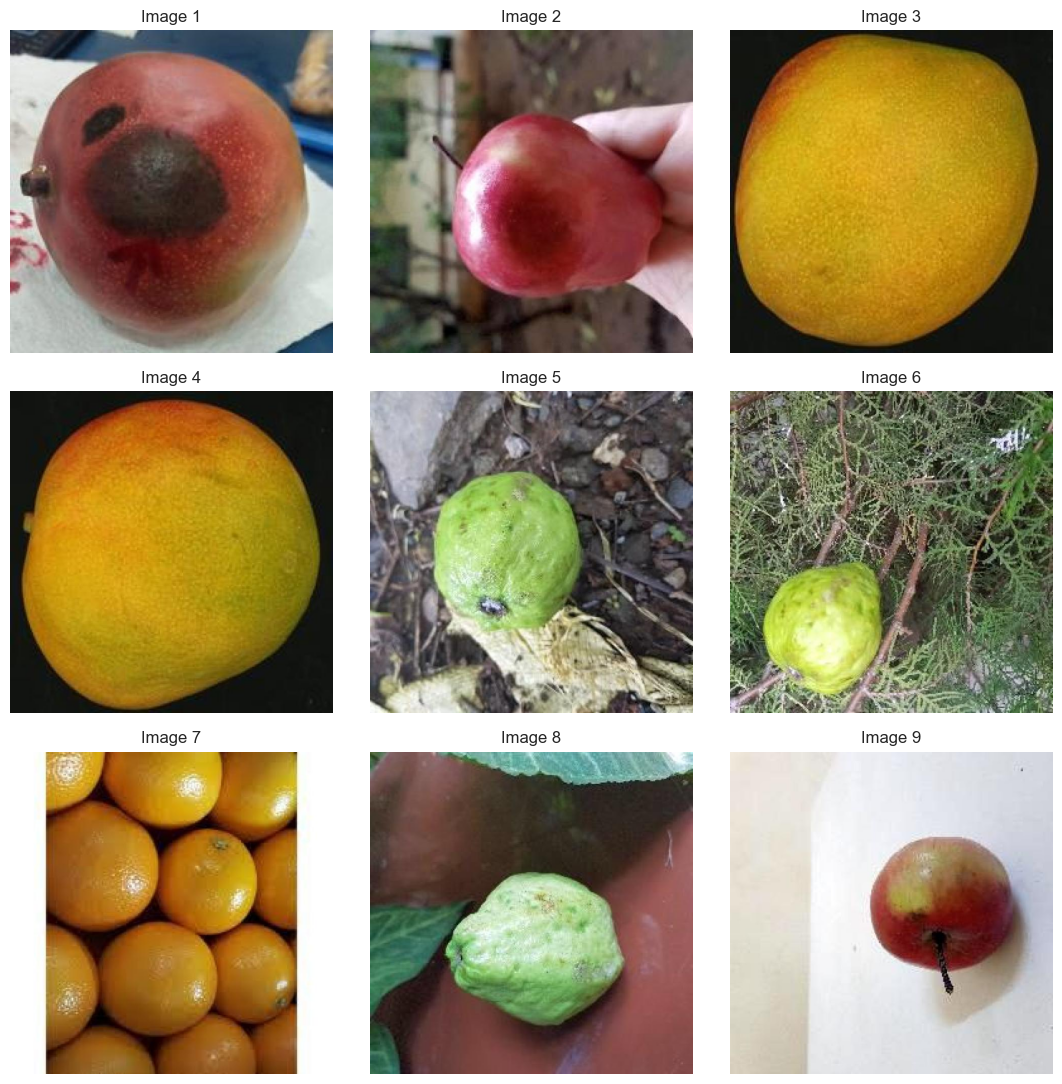

In [4]:
Image_dir = r'D:\DO 2\Fruit\train\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Get the size of the image
# Update the image path
image_path = r"D:\DO 2\Fruit\train\images\1_29_11zon_jpg.rf.8f63a00cc68711ac4fedf7b2bcae9ba4.jpg"

# Get the size of the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    h, w, c = image.shape
    print(f"The image has dimensions {w}x{h} and {c} channels.")
else:
    print("Error: Image not found or unable to load.")

The image has dimensions 640x640 and 3 channels.



image 1/1 D:\DO 2\Fruit\train\images\1_29_11zon_jpg.rf.8f63a00cc68711ac4fedf7b2bcae9ba4.jpg: 640x640 2 vases, 1274.9ms
Speed: 48.7ms preprocess, 1274.9ms inference, 33.8ms postprocess per image at shape (1, 3, 640, 640)


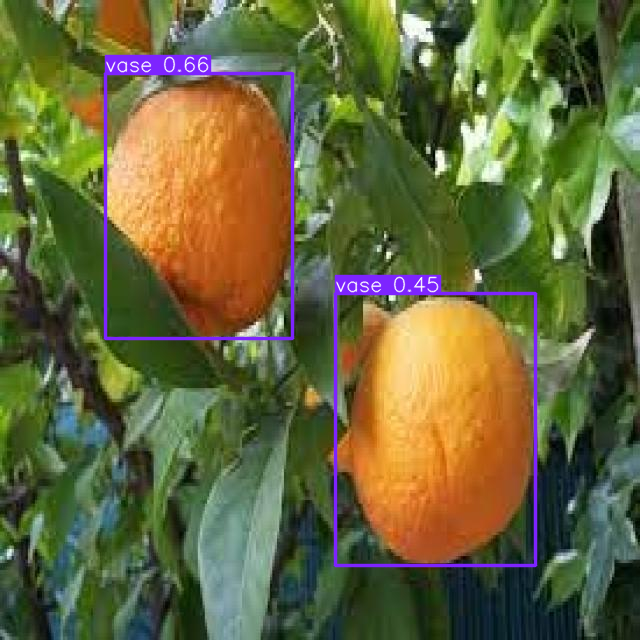

In [6]:
# Use a pretrained YOLOv11n model
model = YOLO("yolo11n.pt")

# Use the model to detect object
image = r"D:\DO 2\Fruit\train\images\1_29_11zon_jpg.rf.8f63a00cc68711ac4fedf7b2bcae9ba4.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data=r"D:\DO 2\Fruit\data.yaml", epochs=10, batch=-1, optimizer='auto')

Ultralytics 8.3.53  Python-3.11.0rc2 torch-2.5.1+cpu CPU (Intel Celeron N4020 1.10GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=D:\DO 2\Fruit\data.yaml, epochs=10, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning D:\DO 2\Fruit\train\labels... 1388 images, 20 backgrounds, 0 corrupt: 100%|██████████| 1388/1388 [00:47<00:00, 29.50it/s]


train: New cache created: D:\DO 2\Fruit\train\labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch:   intended for CUDA devices, using default batch-size 16


train: Scanning D:\DO 2\Fruit\train\labels.cache... 1388 images, 20 backgrounds, 0 corrupt: 100%|██████████| 1388/1388 [00:00<?, ?it/s]
val: Scanning D:\DO 2\Fruit\valid\labels... 108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:03<00:00, 33.16it/s]


val: New cache created: D:\DO 2\Fruit\valid\labels.cache
Plotting labels to c:\Users\User\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to c:\Users\User\runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.3918      3.201      1.012         13        640: 100%|██████████| 87/87 [2:29:43<00:00, 103.25s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:34<00:00, 38.53s/it]

                   all        108        122      0.043          1      0.991      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.3337      1.878     0.9642         15        640: 100%|██████████| 87/87 [2:02:57<00:00, 84.79s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:33<00:00, 38.25s/it]

                   all        108        122      0.068          1      0.982      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.3486      1.586     0.9586         18        640: 100%|██████████| 87/87 [2:08:46<00:00, 88.81s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:41<00:00, 40.39s/it]

                   all        108        122      0.966      0.694      0.959      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.3323      1.357     0.9596         16        640: 100%|██████████| 87/87 [2:18:53<00:00, 95.79s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:28<00:00, 37.14s/it]

                   all        108        122      0.974      0.305       0.97      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.3027      1.122     0.9276         19        640: 100%|██████████| 87/87 [2:14:08<00:00, 92.51s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:30<00:00, 37.59s/it]

                   all        108        122          1      0.781      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.2856      1.028     0.9225         17        640: 100%|██████████| 87/87 [2:26:31<00:00, 101.06s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:35<00:00, 38.90s/it]

                   all        108        122      0.966      0.762      0.965      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      0.272     0.8935     0.9093         14        640: 100%|██████████| 87/87 [2:14:18<00:00, 92.62s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:39<00:00, 39.98s/it]

                   all        108        122          1      0.837      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.2494     0.7685     0.9023         14        640: 100%|██████████| 87/87 [4:35:05<00:00, 189.72s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:39<00:00, 39.93s/it]

                   all        108        122          1      0.742      0.983      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.2239     0.6845     0.8805         15        640: 100%|██████████| 87/87 [2:15:47<00:00, 93.65s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:41<00:00, 40.29s/it]

                   all        108        122          1      0.819      0.993      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.2093     0.6142     0.8707         15        640: 100%|██████████| 87/87 [2:23:59<00:00, 99.30s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:51<00:00, 42.85s/it]

                   all        108        122      0.976      0.667      0.975       0.94



10 epochs completed in 25.634 hours.
Optimizer stripped from c:\Users\User\runs\detect\train\weights\last.pt, 5.5MB
Optimizer stripped from c:\Users\User\runs\detect\train\weights\best.pt, 5.5MB

Validating c:\Users\User\runs\detect\train\weights\best.pt...
Ultralytics 8.3.53  Python-3.11.0rc2 torch-2.5.1+cpu CPU (Intel Celeron N4020 1.10GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:31<00:00, 37.99s/it]


                   all        108        122          1       0.82      0.993      0.965
             Bad_Apple        108        122          1       0.82      0.993      0.965
Speed: 27.0ms preprocess, 1335.6ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to c:\Users\User\runs\detect\train


In [9]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

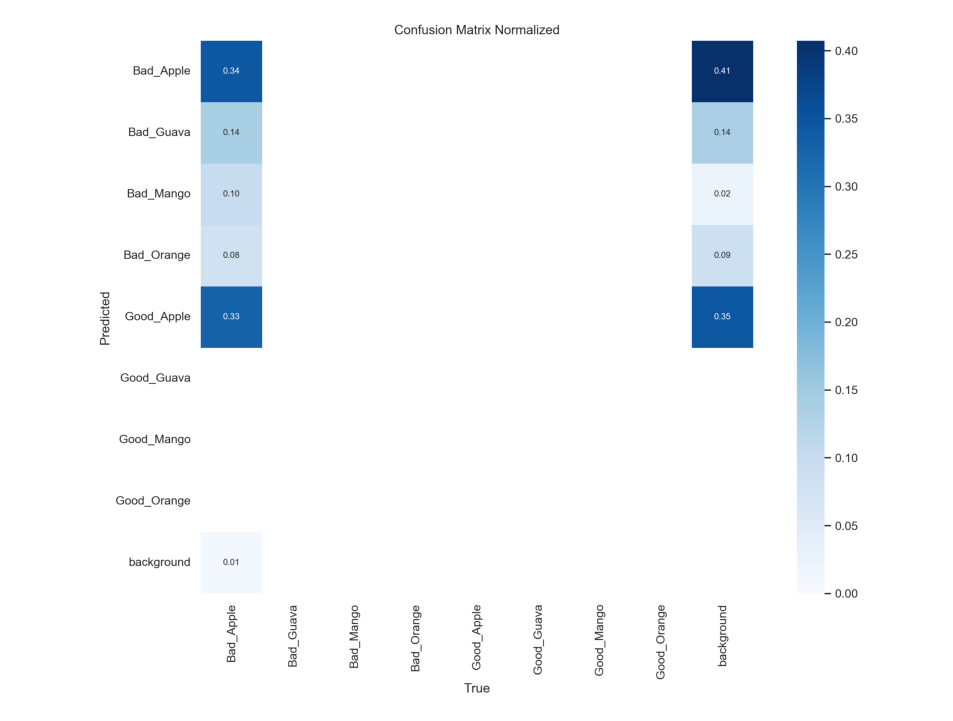

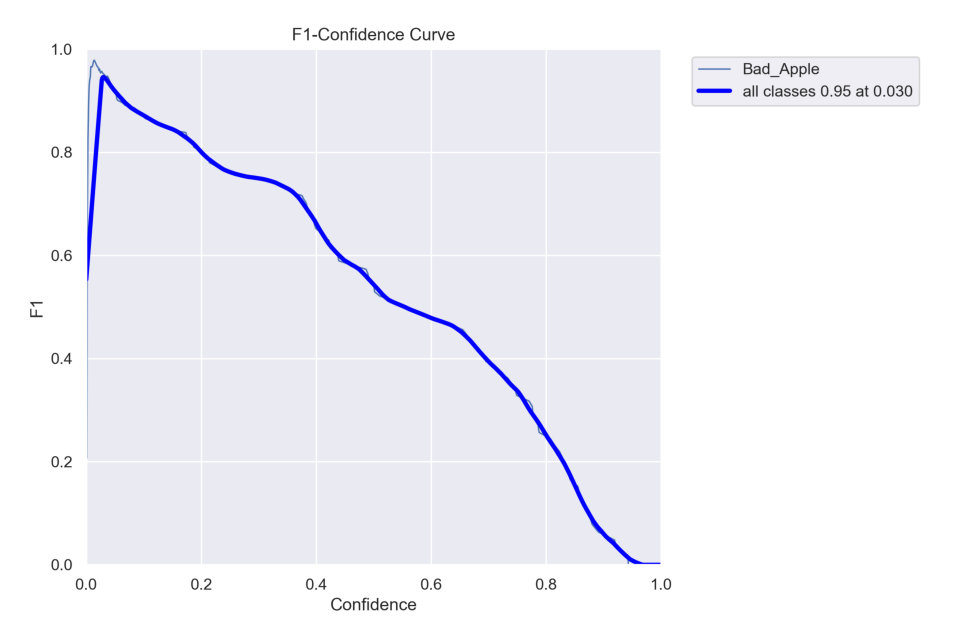

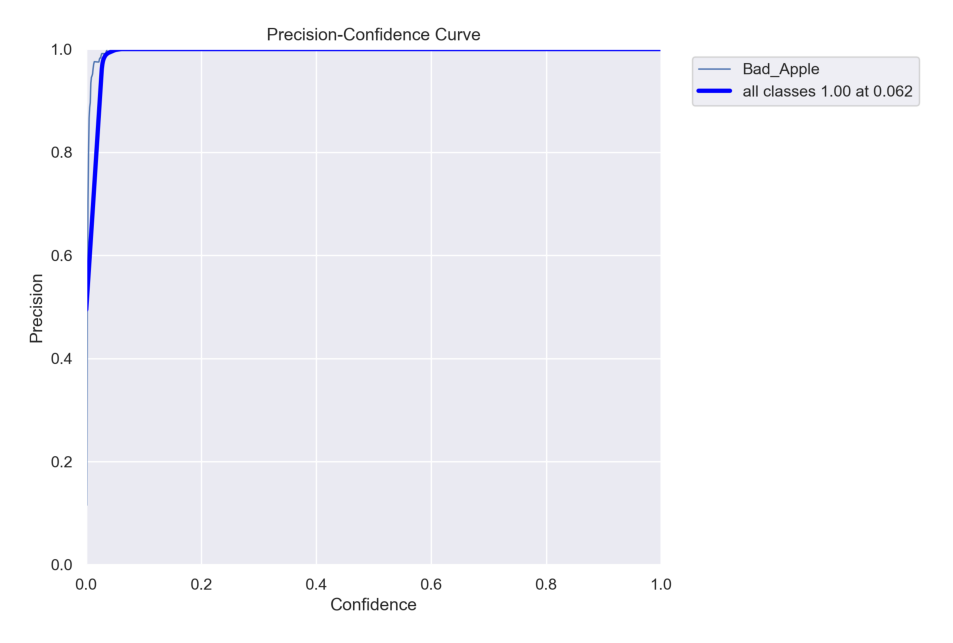

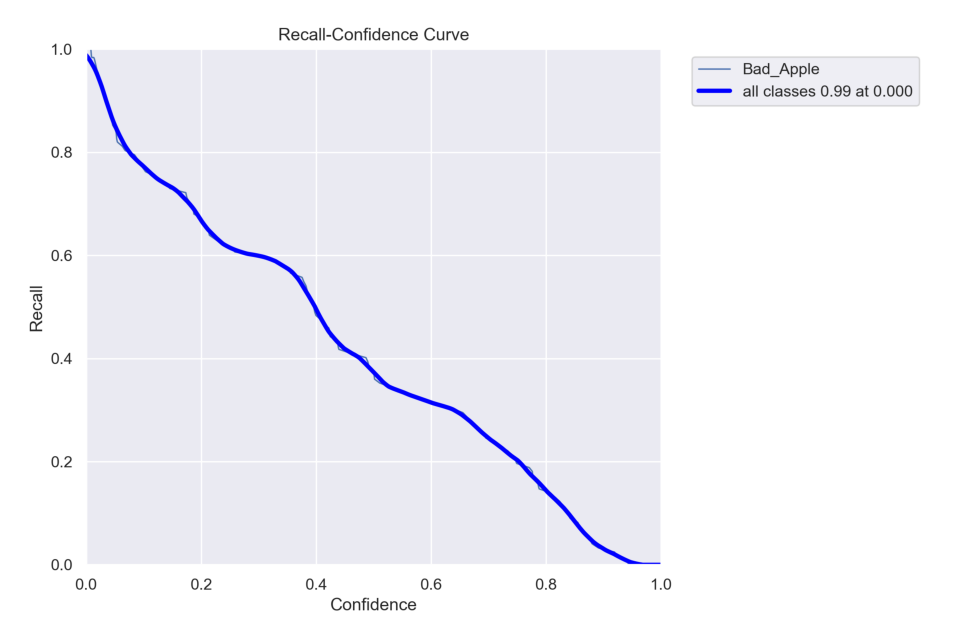

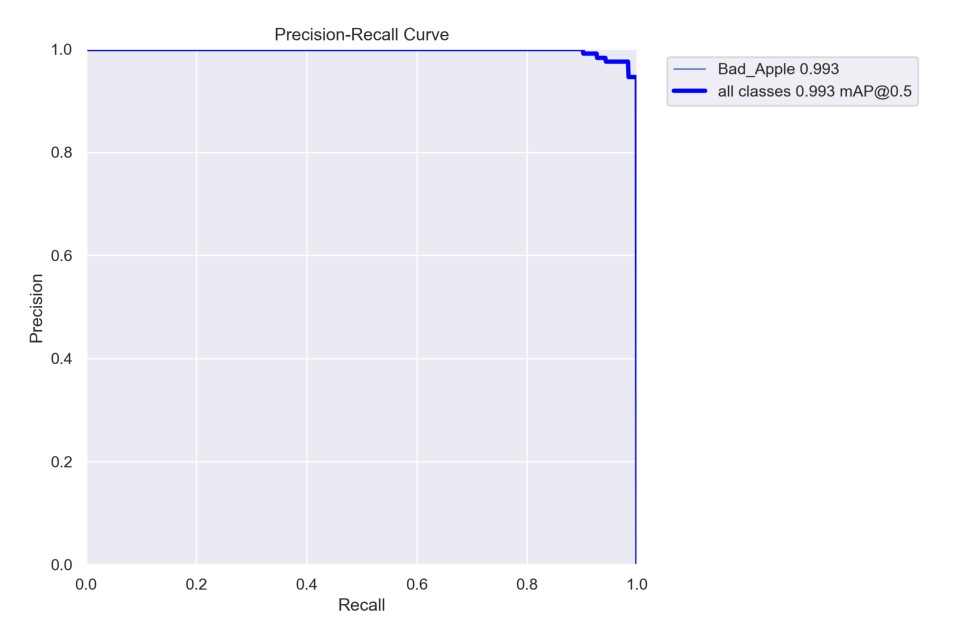

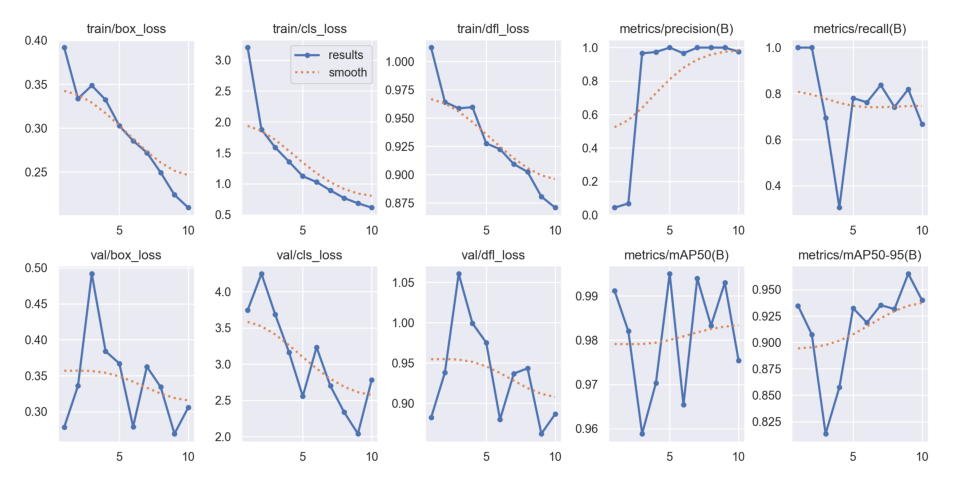

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [ 
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = r'D:\DO 2\runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [11]:
Result_Final_model = pd.read_csv('runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   9162.2         0.39183         3.20099         1.01232   
1      2  16697.8         0.33365         1.87784         0.96423   
2      3  24591.6         0.34856         1.58597         0.95860   
3      4  33079.9         0.33230         1.35729         0.95963   
4      5  41285.2         0.30267         1.12195         0.92755   
5      6  50238.8         0.28561         1.02814         0.92246   
6      7  58463.1         0.27201         0.89349         0.90928   
7      8  75136.2         0.24936         0.76847         0.90232   
8      9  83453.8         0.22393         0.68446         0.88053   
9     10  92273.0         0.20930         0.61421         0.87074   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.04299            1.00000           0.99114   
1               0.06800            1.00000           0.98201   
2               0.96576            0.69365           0.95886   
3               0.97381            0.30478           0.97032   
4               1.00000            0.78051           0.99500   
5               0.96599            0.76230           0.96540   
6               1.00000            0.83718           0.99394   
7               1.00000            0.74222           0.98329   
8               1.00000            0.81928           0.99296   
9               0.97603            0.66747           0.97541   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.93472       0.27846       3.74447       0.88229  0.000274   
1              0.90753       0.33598       4.24798       0.93822  0.000497   
2              0.81350       0.49192       3.68457       1.06061  0.000666   
3              0.85738       0.38407       3.16283       0.99915  0.000586   
4              0.93244       0.36705       2.55693       0.97525  0.000503   
5              0.91865       0.27894       3.23341       0.87996  0.000421   
6              0.93530       0.36251       2.69983       0.93686  0.000338   
7              0.93155       0.33427       2.33767       0.94339  0.000256   
8              0.96505       0.26922       2.03962       0.86230  0.000173   
9              0.93993       0.30568       2.78135       0.88663  0.000091   

     lr/pg1    lr/pg2  
0  0.000274  0.000274  
1  0.000497  0.000497  
2  0.000666  0.000666  
3  0.000586  0.000586  
4  0.000503  0.000503  
5  0.000421  0.000421  
6  0.000338  0.000338  
7  0.000256  0.000256  
8  0.000173  0.000173  
9  0.000091  0.000091

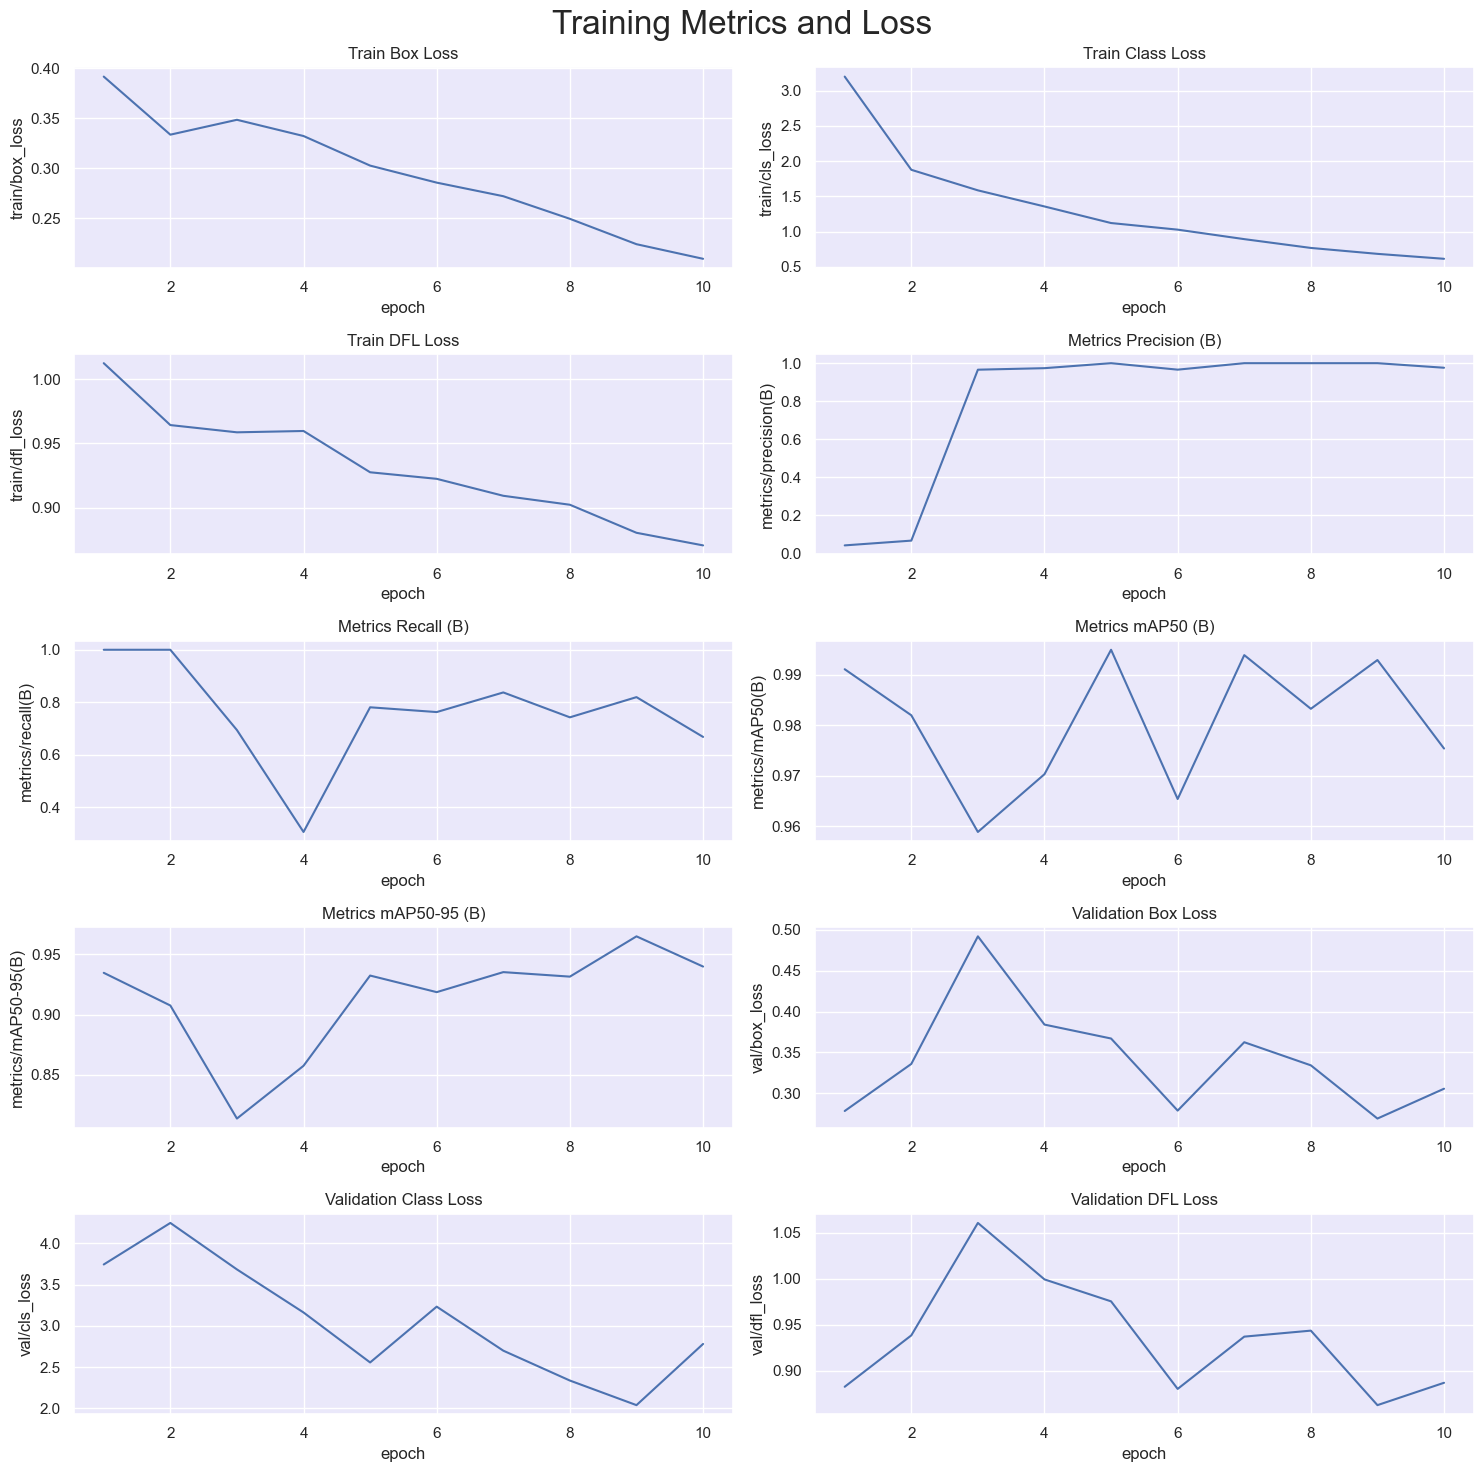

In [12]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [13]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train/weights/best.pt')

In [14]:
# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.53  Python-3.11.0rc2 torch-2.5.1+cpu CPU (Intel Celeron N4020 1.10GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning D:\DO 2\Fruit\valid\labels.cache... 108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:44<00:00, 23.51s/it]


                   all        108        122          1       0.82      0.993      0.965
             Bad_Apple        108        122          1       0.82      0.993      0.965
Speed: 22.2ms preprocess, 1454.5ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to c:\Users\User\runs\detect\val
precision(B):  1.0
metrics/recall(B):  0.8202176874265382
metrics/mAP50(B):  0.9929644356466162
metrics/mAP50-95(B):  0.9649958399355022



0: 640x640 1 Bad_Apple, 2 Bad_Oranges, 5401.7ms
Speed: 121.0ms preprocess, 5401.7ms inference, 46.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bad_Apple, 1 Bad_Orange, 2677.8ms
Speed: 26.0ms preprocess, 2677.8ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bad_Apple, 1510.1ms
Speed: 16.0ms preprocess, 1510.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bad_Apple, 1 Good_Apple, 1636.5ms
Speed: 32.0ms preprocess, 1636.5ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Good_Apple, 1811.3ms
Speed: 21.0ms preprocess, 1811.3ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bad_Orange, 1845.5ms
Speed: 14.0ms preprocess, 1845.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Bad_Orange, 1898.6ms
Speed: 167.0ms preprocess, 1898.6ms inference, 50.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 

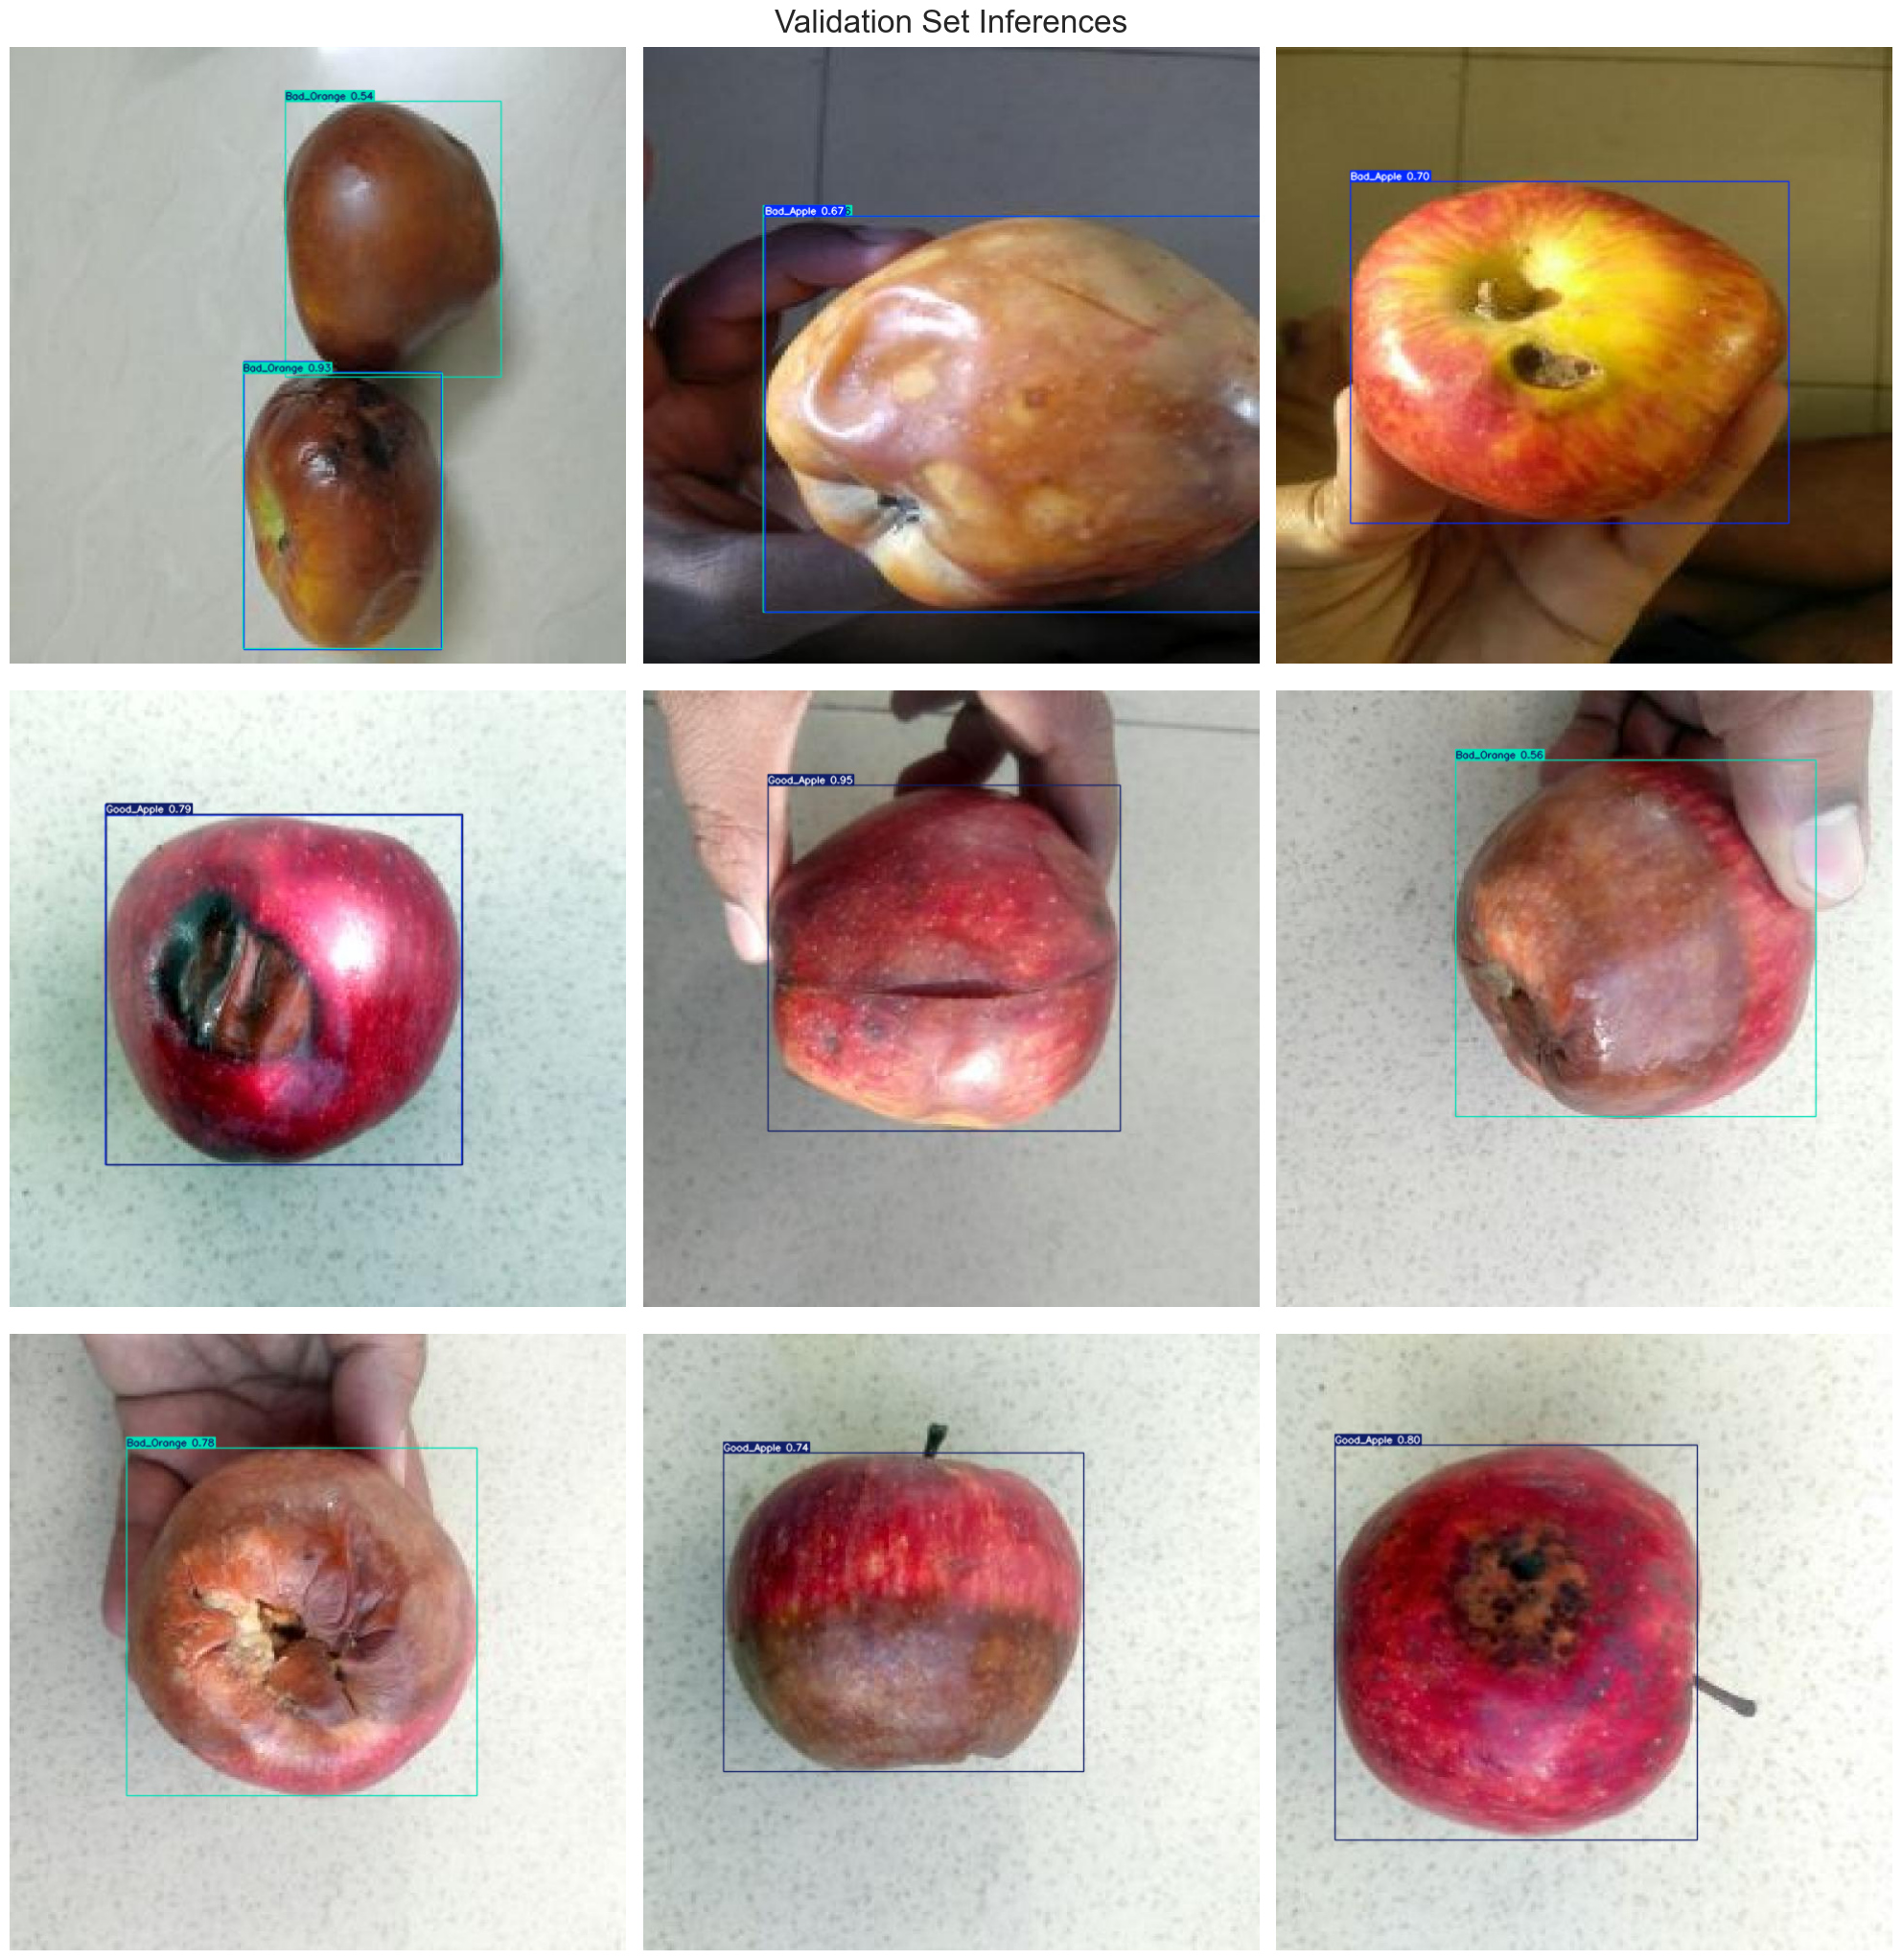

In [17]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = r"D:\DO 2\Fruit"   # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()